In [ ]:
# Evidencia Semana Tec Luisa Merlo García - A01067715


In [49]:
# librerias
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = ""

Mounted at /content/drive


In [6]:
# url string that hosts our .csv file

# url = "/content/drive/My Drive/cartwheel (1).csv"
url = "/content/drive/My Drive/A01067715_X.csv"

# Read the .csv file and store it as a pandas Data Frame

dataset = pd.read_csv(url)
dataset # cargamos e imprimimos el dataset

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,0,3.912510,2.041090,9.876281,-4.095240,9.949433,-2.977835,-10.251960,8.596437,-5.301048,-3.680722,7.495801,-7.534606,7.435167,2.836710,5.869534
1,1,-0.914758,0.612357,-9.034416,11.786880,-0.065124,-2.729766,8.612733,-6.893388,9.711912,1.806030,-12.208551,2.979453,2.015477,-2.344433,0.848113
2,2,-6.600907,6.717296,-5.581675,6.373705,6.665907,-5.139226,-4.563789,-10.735494,3.188322,-9.679903,-9.083256,1.274367,5.580439,8.554601,-0.017045
3,3,-0.636355,3.261990,-6.193519,10.292129,1.889753,-1.551429,7.766680,-6.265555,8.646577,3.592844,-10.808746,4.208241,5.063795,-2.356681,-0.290679
4,4,-1.608625,2.582689,-10.061999,9.196339,-0.190643,-3.576329,8.391966,-4.928845,6.996657,5.648161,-7.991251,4.086446,8.370765,-2.724262,-1.066687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,600,-8.162644,10.527227,-4.371231,5.711720,5.891591,-2.665363,7.615966,6.591918,-1.017358,1.960923,-0.984875,-0.214896,8.377361,-6.856560,-3.393814
601,601,-11.511695,8.648891,-7.626384,6.282916,4.490459,-3.127556,4.512800,7.835550,0.480538,4.463814,-0.184548,-1.750853,6.703391,-4.396969,-2.005184
602,602,-5.093731,5.643242,-1.489040,8.035114,7.878595,-6.822736,-4.448379,-5.638634,3.467168,-11.379479,-8.787177,-0.312055,4.357236,4.754031,1.332436
603,603,3.234866,9.823818,-10.261647,-6.639484,4.174998,-5.548330,0.301068,-5.261385,-3.098398,6.627036,-5.011552,-7.825027,-9.765251,-5.196300,-4.069836


In [7]:
# empezamos a analizar el dataset, primero los aspectos generales
type(dataset)

pandas.core.frame.DataFrame

In [42]:
# Print dataset shape
print(dataset.shape)

(605, 15)


In [8]:
# Número de filas
Nrows = dataset.shape[0]
print(Nrows)

605


In [43]:
# Número de columnas
Ncols = dataset.shape[1]
print(Ncols)

15


In [79]:
# Mostramos las primeras 10 filas
dataset.head(10)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,Label
0,3.912510,2.041090,9.876281,-4.095240,9.949433,-2.977835,-10.251960,8.596437,-5.301048,-3.680722,7.495801,-7.534606,7.435167,2.836710,5.869534,0
1,-0.914758,0.612357,-9.034416,11.786880,-0.065124,-2.729766,8.612733,-6.893388,9.711912,1.806030,-12.208551,2.979453,2.015477,-2.344433,0.848113,1
2,-6.600907,6.717296,-5.581675,6.373705,6.665907,-5.139226,-4.563789,-10.735494,3.188322,-9.679903,-9.083256,1.274367,5.580439,8.554601,-0.017045,1
3,-0.636355,3.261990,-6.193519,10.292129,1.889753,-1.551429,7.766680,-6.265555,8.646577,3.592844,-10.808746,4.208241,5.063795,-2.356681,-0.290679,0
4,-1.608625,2.582689,-10.061999,9.196339,-0.190643,-3.576329,8.391966,-4.928845,6.996657,5.648161,-7.991251,4.086446,8.370765,-2.724262,-1.066687,1
5,-3.490055,0.410034,3.588255,10.214583,-1.537280,-1.932361,-4.309486,0.963549,1.525151,-1.930526,-1.187386,8.737275,-8.209910,-10.285113,5.097405,2
6,-6.461462,2.012879,5.569267,4.899249,0.407565,1.145745,-3.378923,4.349572,3.527304,-2.605031,-0.568480,6.515001,-6.696172,-8.095701,8.264788,0
7,-2.754791,6.215147,-3.199184,5.113767,6.953703,-3.847247,-3.087261,-5.333729,2.877782,-3.715518,-5.552909,3.564918,3.572831,5.374840,-3.163023,2
8,6.317250,5.749455,-11.506584,-8.256153,2.133207,-7.905113,-2.227351,-6.561197,-8.946559,4.311365,-2.862310,-9.367368,-8.697796,-3.887850,-0.877662,1
9,-2.099657,4.884892,-3.867008,9.087333,1.383616,-6.016782,9.122445,-2.827868,11.603634,2.494386,-10.720756,3.368391,4.338824,0.595347,-1.793720,2


In [80]:
# Mostrar últimas filas
dataset.tail(5)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,Label
600,-8.162644,10.527227,-4.371231,5.711720,5.891591,-2.665363,7.615966,6.591918,-1.017358,1.960923,-0.984875,-0.214896,8.377361,-6.856560,-3.393814,0
601,-11.511695,8.648891,-7.626384,6.282916,4.490459,-3.127556,4.512800,7.835550,0.480538,4.463814,-0.184548,-1.750853,6.703391,-4.396969,-2.005184,1
602,-5.093731,5.643242,-1.489040,8.035114,7.878595,-6.822736,-4.448379,-5.638634,3.467168,-11.379479,-8.787177,-0.312055,4.357236,4.754031,1.332436,2
603,3.234866,9.823818,-10.261647,-6.639484,4.174998,-5.548330,0.301068,-5.261385,-3.098398,6.627036,-5.011552,-7.825027,-9.765251,-5.196300,-4.069836,0
604,-7.100106,8.922225,-4.660552,6.137296,8.269606,-0.932246,11.289968,4.951344,1.890779,4.557358,-0.392673,0.032266,7.339894,-1.305959,-1.943263,2


In [15]:
dataset.columns

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15'],
      dtype='object')

In [16]:
dataset.dtypes

,0
Unnamed: 0,int64
x1,float64
x2,float64
x3,float64
x4,float64
x5,float64
x6,float64
x7,float64
x8,float64
x9,float64


In [17]:
# Resumen de las estadísticas para las variables cuantitativas
dataset.describe()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
count,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000
mean,302.000000,-1.661607,4.951496,-1.326170,3.505581,3.616137,-3.043004,-0.233664,0.568526,0.269960,-0.245706,-2.062167,-1.071662,1.311252,-1.521187,1.221170
std,174.792734,5.348118,3.799033,6.980261,6.961344,4.228243,3.373637,6.306391,5.853121,5.828502,5.271002,5.599088,6.640797,7.156081,5.017562,4.681542
min,0.000000,-13.887758,-6.853043,-13.191245,-12.094535,-6.460943,-14.947022,-12.736280,-10.735494,-12.009907,-11.379479,-14.982310,-14.363617,-14.556891,-13.454041,-10.025526
25%,151.000000,-5.682907,2.412575,-7.283628,-3.474005,-0.083022,-5.097544,-5.023637,-4.803003,-4.765597,-4.712101,-6.900687,-7.844463,-6.083515,-4.889037,-2.425431
50%,302.000000,-1.970893,4.989412,-3.147838,6.472911,3.690424,-2.785277,-2.021708,-0.009194,0.395371,-0.485783,-1.829282,0.202102,3.916461,-2.498609,0.045687
75%,453.000000,2.043281,7.769259,5.505841,8.843496,7.178649,-0.856490,6.248250,6.104121,4.081632,4.461135,1.422697,4.101285,6.642880,2.127932,5.379769
max,604.000000,11.413077,13.733761,14.500814,14.521263,13.566953,5.284033,14.802813,11.828576,14.815292,12.076639,10.600467,13.181435,15.555502,11.844601,13.630337


In [81]:
dataset.sort_values("x1",ascending=True)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,Label
400,-13.887758,9.322184,-8.045484,6.412580,5.472574,-3.532217,2.865690,5.652787,-1.840849,4.126631,-0.402611,-2.179008,9.193234,-2.248500,-1.164246,2
528,-13.030736,9.335588,-7.914422,8.810387,4.608887,-1.905532,6.577748,-1.070220,2.600857,-2.446124,-3.656637,-2.947844,2.512740,-4.739536,-2.974991,1
349,-12.201571,8.663793,-4.778933,8.051498,7.955354,-2.584312,7.797026,3.296306,-1.056233,8.414973,1.853210,-1.420260,3.042782,-4.712862,-4.578035,2
501,-11.995167,9.916116,-9.009927,-0.235466,6.630353,-2.642869,6.154431,3.490468,0.428613,4.598283,-1.021639,-1.310812,1.608735,-3.875546,-1.695075,2
295,-11.669630,12.422479,-9.398003,4.874110,9.994894,-2.277828,5.576983,6.408102,-1.441488,5.216408,3.137242,-5.008711,2.892571,-3.452274,-3.974163,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,10.348949,6.356896,-10.586363,-6.256527,1.807586,-6.586548,-1.415539,-4.823987,-8.324068,5.139018,-5.016794,-9.986830,-6.974733,-3.163983,-2.454821,2
251,10.383783,4.954601,-7.814535,-8.029866,4.374687,-9.324255,-1.082535,-6.348526,-2.233711,6.065013,-2.094325,-9.874845,-8.820627,-3.833752,0.058827,1
249,10.520614,8.203276,-8.346991,-5.003430,1.592596,-6.437015,-3.684338,-4.732436,-7.485065,8.697263,-6.162457,-10.035703,-6.714031,-4.632700,-2.182663,1
44,10.788167,7.927835,-9.361350,-10.522432,2.788245,-7.489626,0.715037,-4.273602,-7.089659,7.178152,-3.921402,-7.551833,-5.508561,-1.476836,1.235884,0


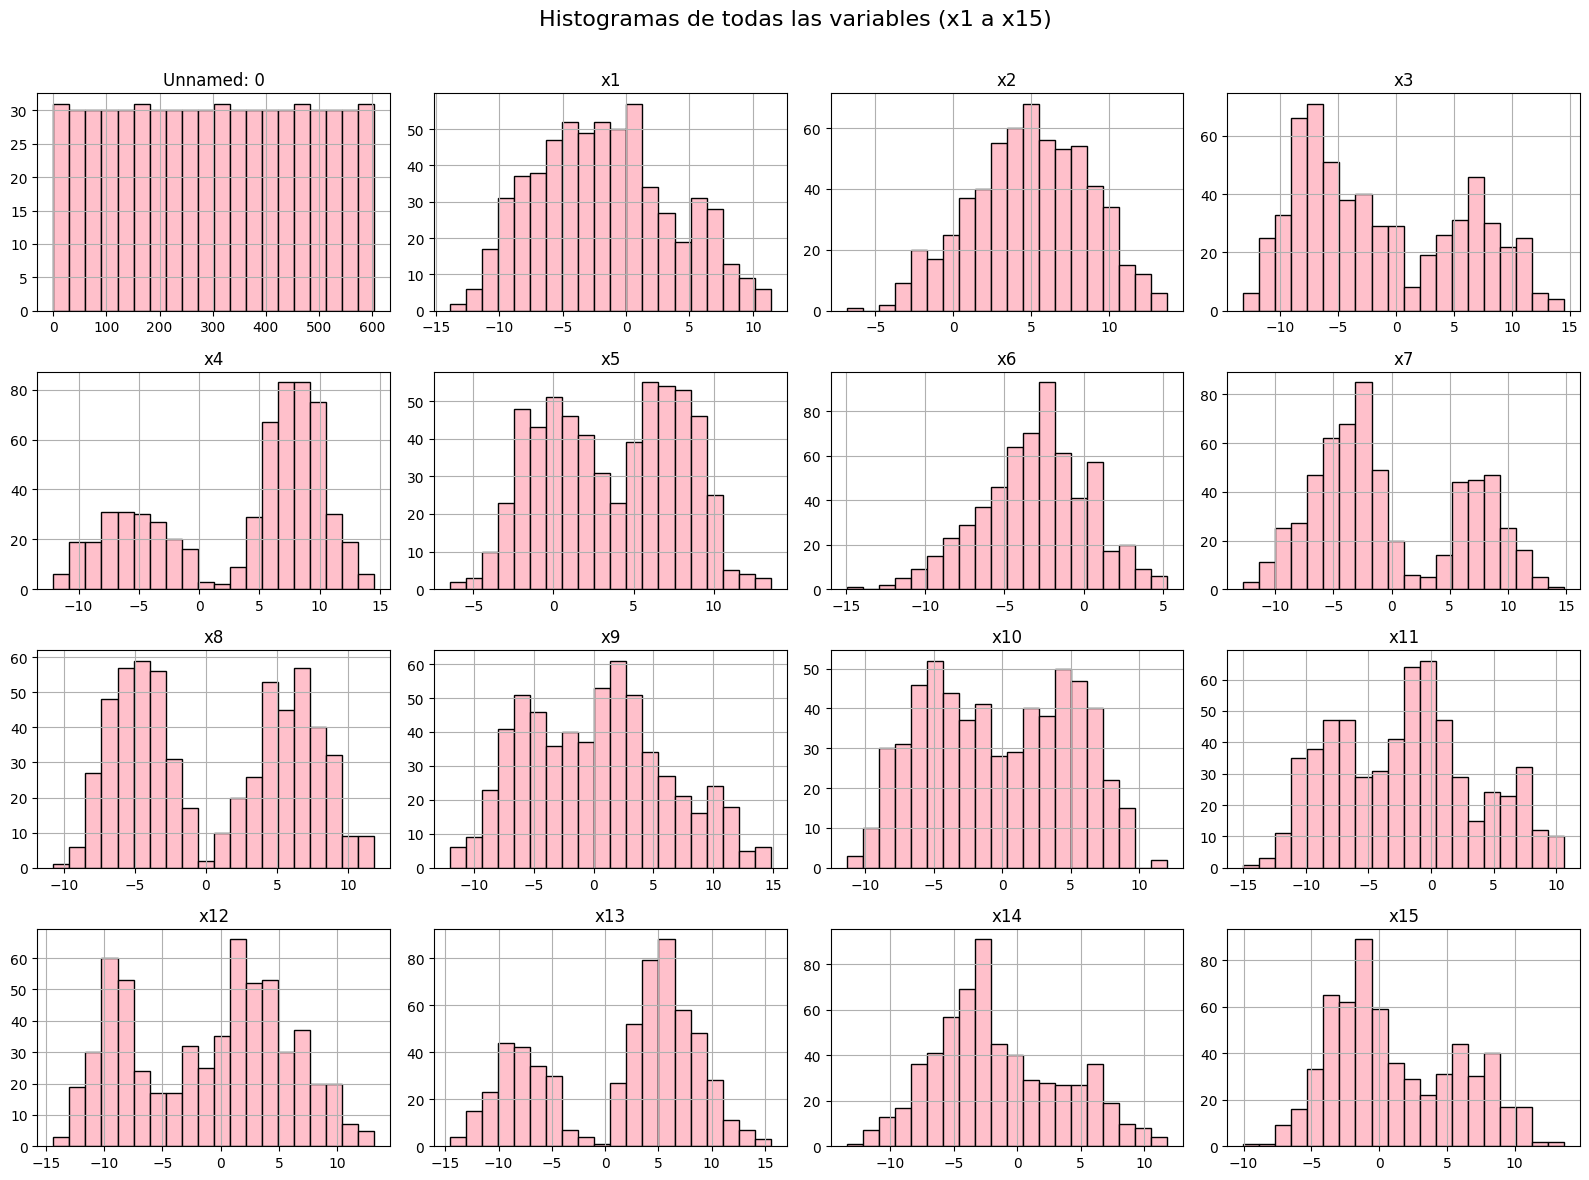

In [22]:
# Histogramas de todas las columns del dataset

dataset.hist(bins=20, figsize=(16, 12), edgecolor='black', color='pink')
plt.suptitle("Histogramas de todas las variables (x1 a x15)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

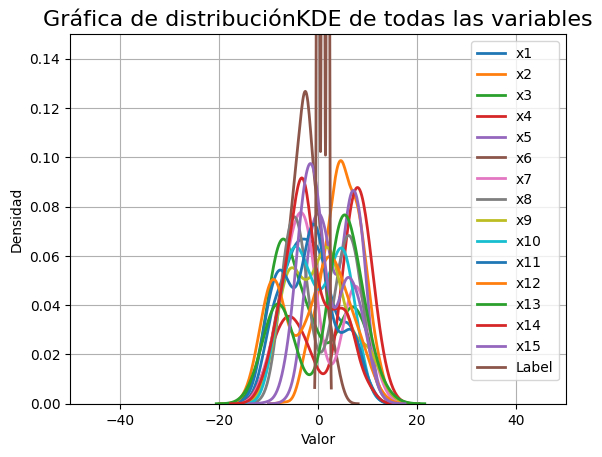

In [82]:
# Gráfico de distribución de los datos

min_val = dataset.min().min()
max_val = dataset.max().max()

for column in dataset.columns:
    sns.kdeplot(dataset[column], label=column, linewidth=2)

plt.xlim(-50,50)
plt.ylim(0, 0.15)

plt.title("Gráfica de distribuciónKDE de todas las variables", fontsize=16)
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

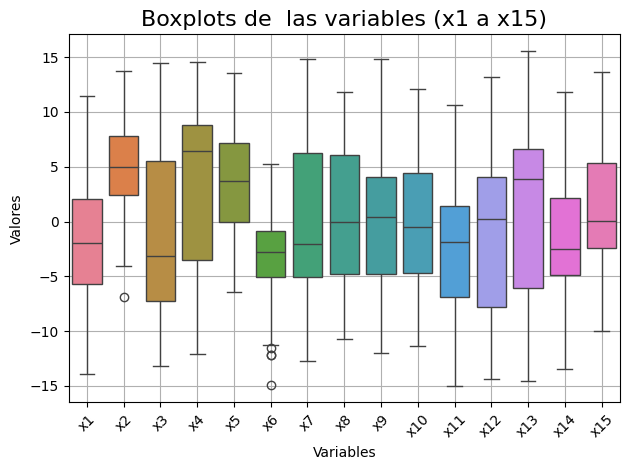

In [36]:
# Boxplots de las variables

#Eliminamos el indice para que no altere
dataset = dataset.drop(columns=["Unnamed: 0"])

#ahora si, el boxplot de todas las variablees
sns.boxplot(data=dataset)
plt.title("Boxplots de  las variables (x1 a x15)", fontsize=16)
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


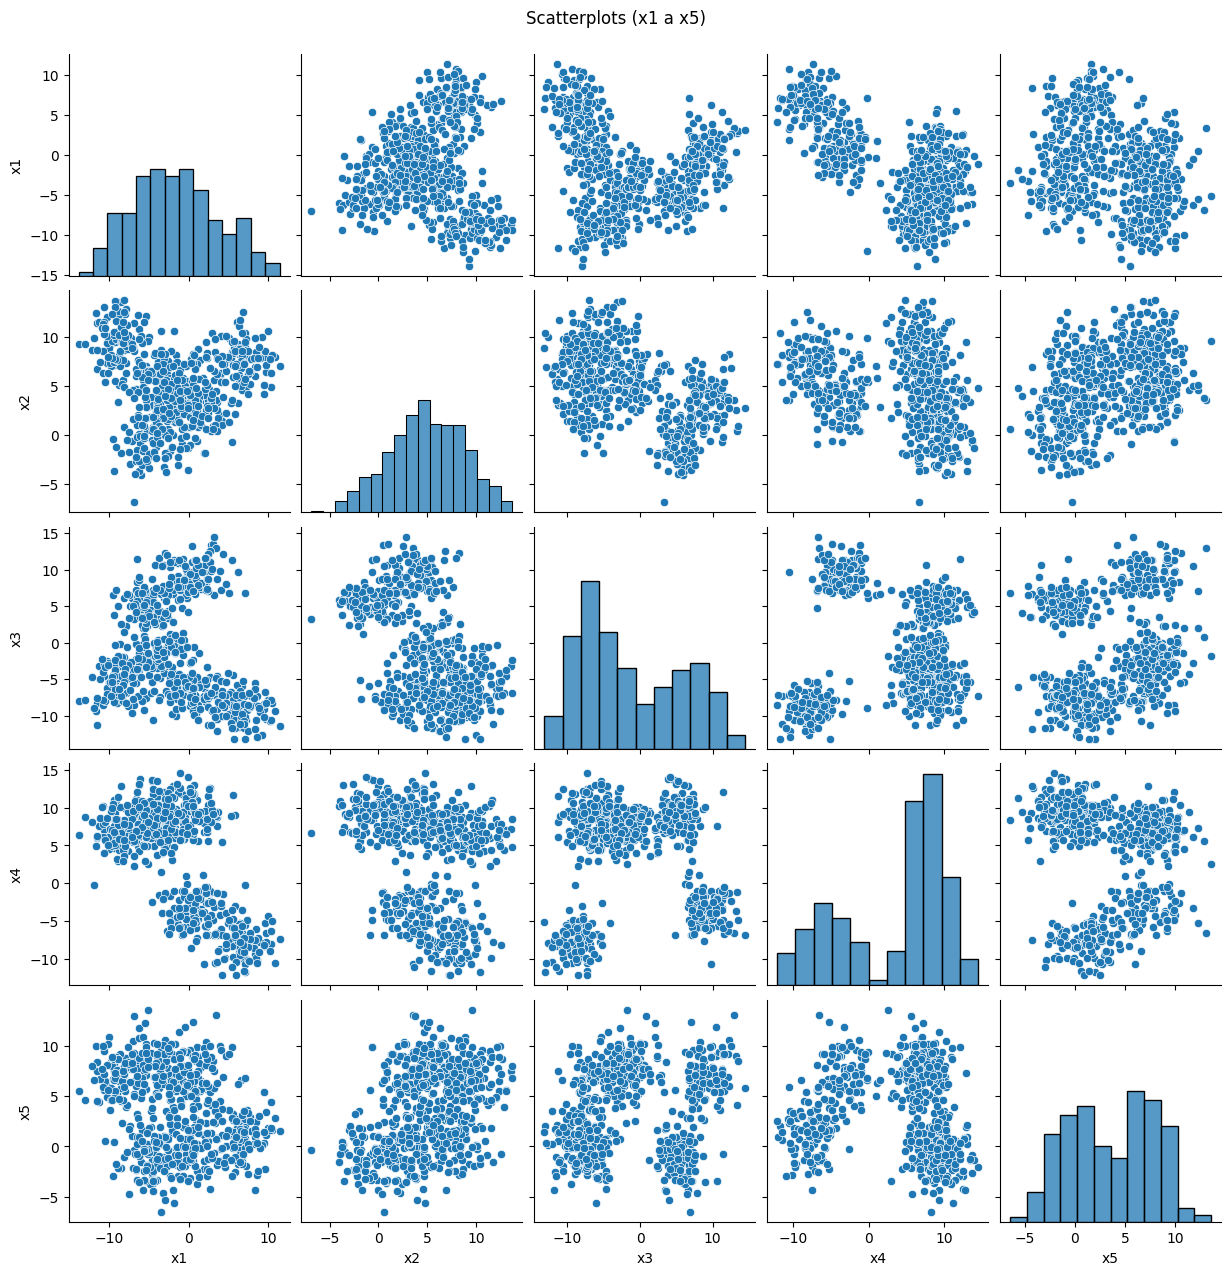

In [45]:
# Scatterplots de 5 en 5 para ver con más detalle
subset = dataset[['x1', 'x2', 'x3', 'x4', 'x5']]

sns.pairplot(subset)
plt.suptitle("Scatterplots (x1 a x5)", y=1.02)
plt.show()

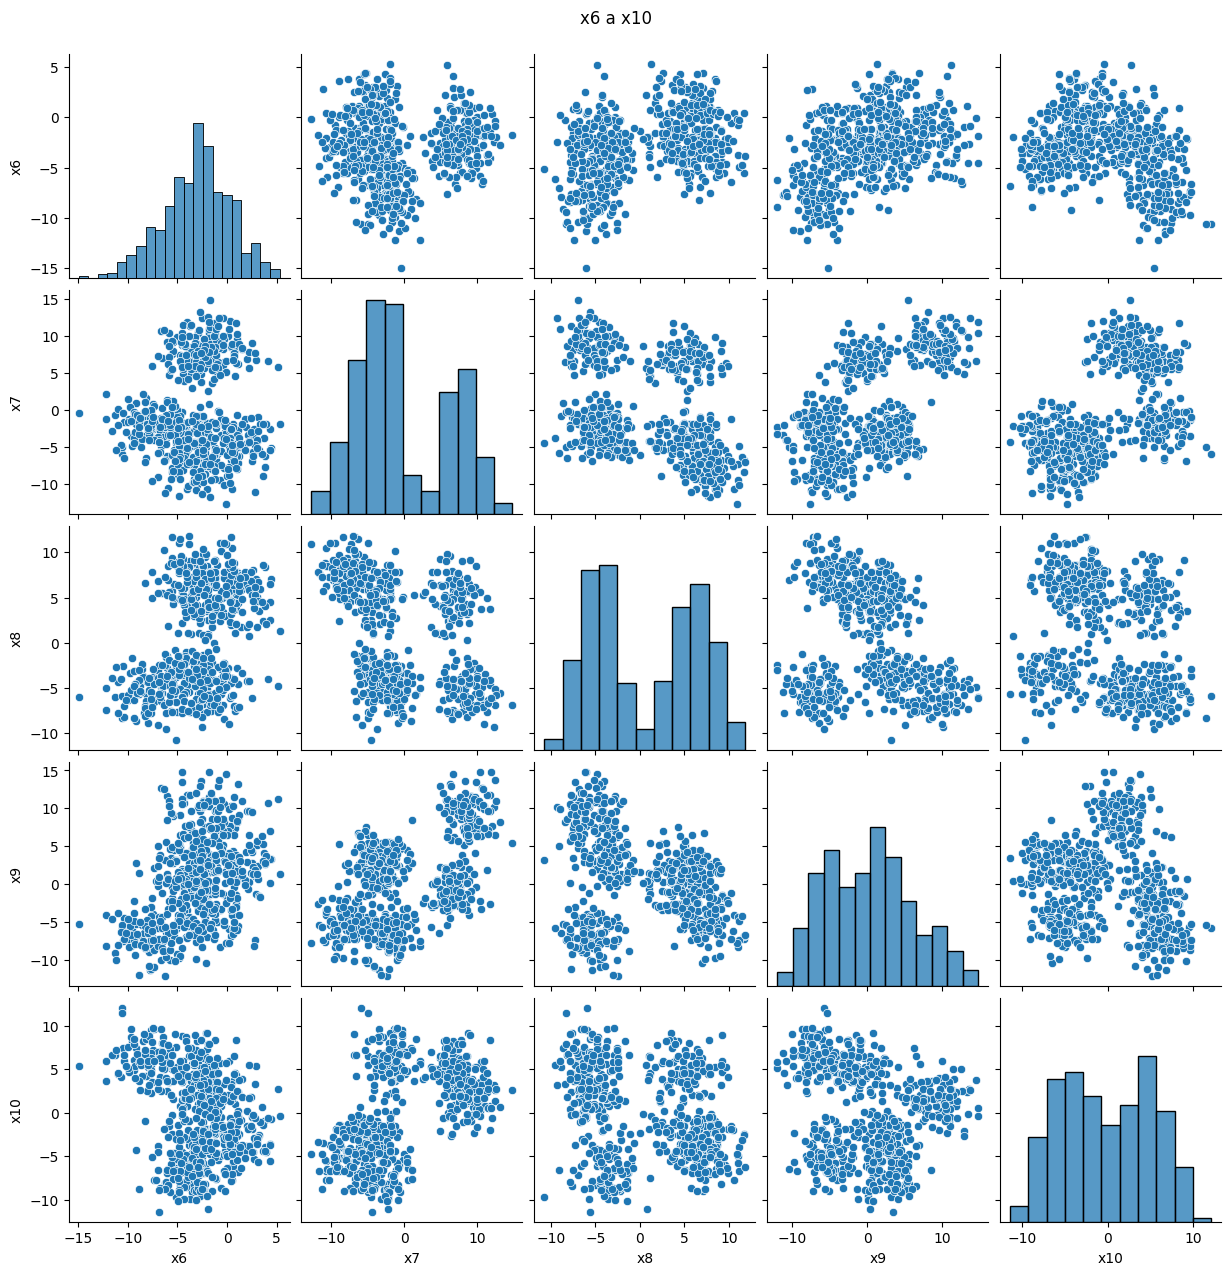

In [44]:
subset = dataset[['x6', 'x7', 'x8', 'x9', 'x10']]
sns.pairplot(subset)
plt.suptitle("x6 a x10", y=1.02)
plt.show()

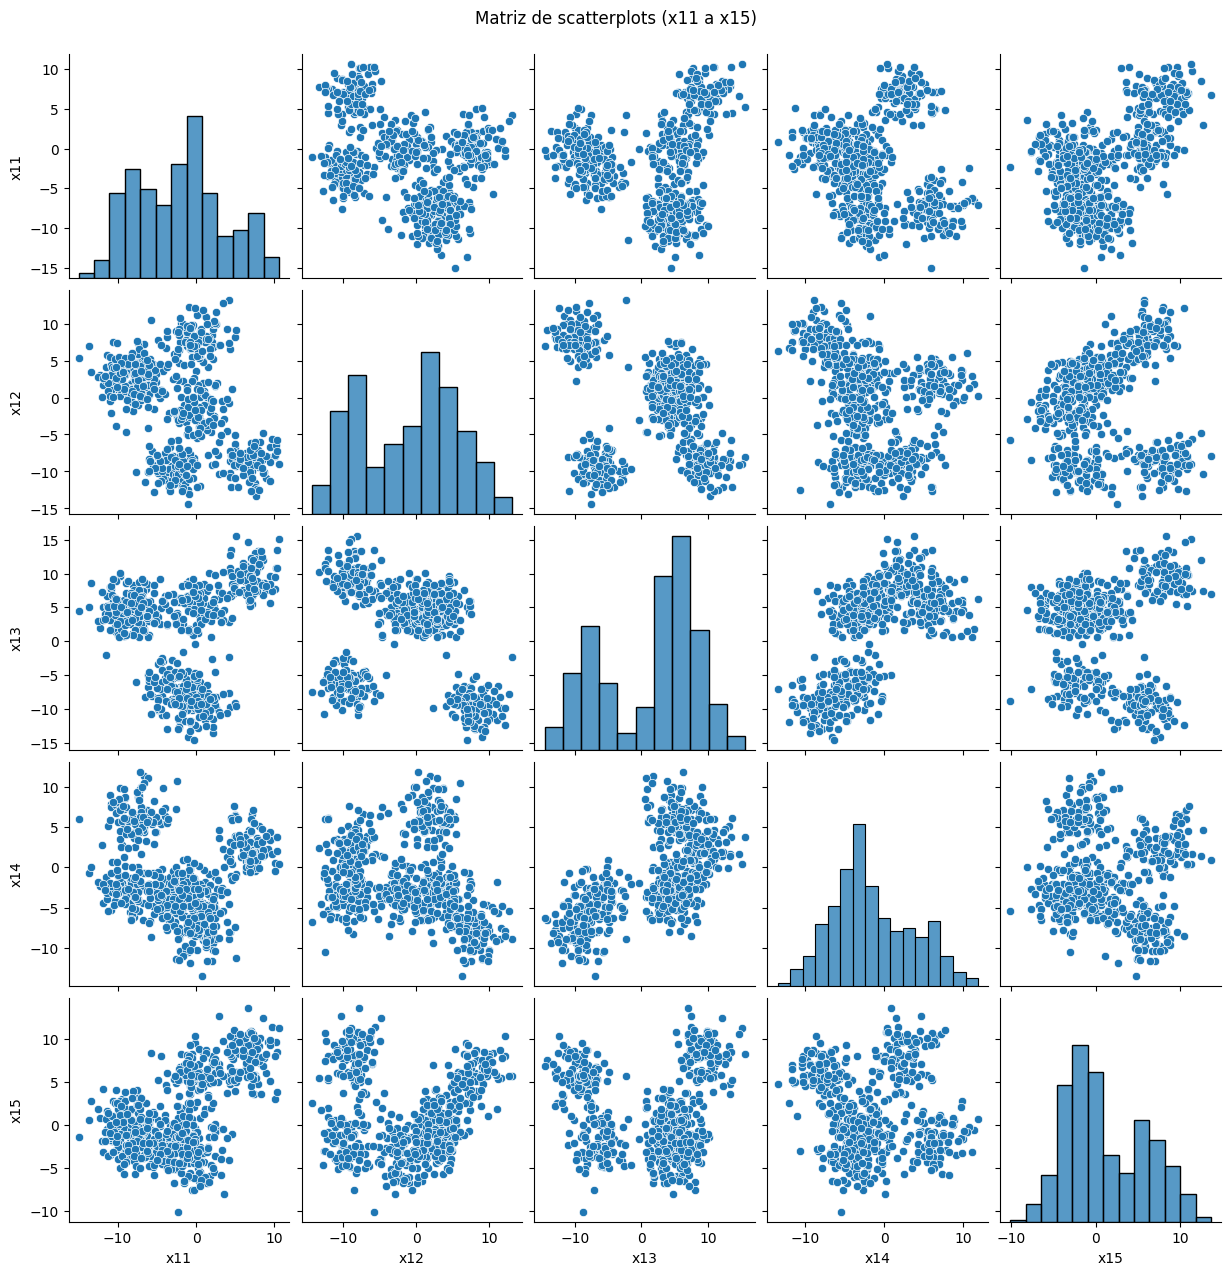

In [41]:
# Seleccionar un subconjunto de variables para no sobrecargar la gráfica
subset = dataset[['x11', 'x12', 'x13', 'x14', 'x15']]

# Crear matriz de dispersión
sns.pairplot(subset)
plt.suptitle("Matriz de scatterplots (x11 a x15)", y=1.02)
plt.show()

In [48]:
# Dividimos el dataset en clusters

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(scaled_data)
df_with_clusters = dataset.copy()
df_with_clusters["cluster"] = labels
# crear los clusters

cluster_0 = df_with_clusters[df_with_clusters["cluster"] == 0]
cluster_1 = df_with_clusters[df_with_clusters["cluster"] == 1]
cluster_2 = df_with_clusters[df_with_clusters["cluster"] == 2]
print("Cluster 0:", cluster_0.shape)
print("Cluster 1:", cluster_1.shape)
print("Cluster 2:", cluster_2.shape)

Cluster 0: (202, 16)
Cluster 1: (101, 16)
Cluster 2: (302, 16)


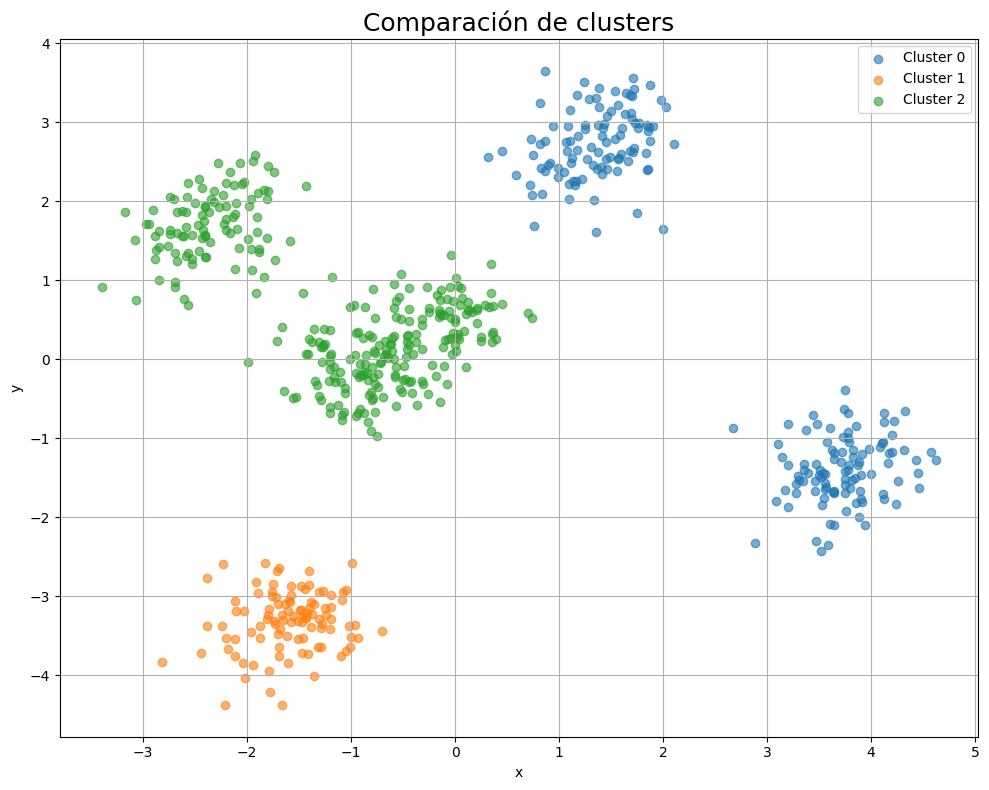

In [52]:

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(scaled_data)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_components, columns=["PC1", "PC2"])
pca_df["cluster"] = labels

# Gráficas para comprarar los clusters
plt.figure(figsize=(10, 8))
for cluster_id in sorted(pca_df["cluster"].unique()):
    subset = pca_df[pca_df["cluster"] == cluster_id]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster_id}", alpha=0.6)

plt.title("Comparación de clusters", fontsize=18)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [55]:
# X  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
X = dataset[["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10", "x11", "x12", "x13", "x14", "x15"]].values
print(type(X))
print(X.shape)
print(X)

<class 'numpy.ndarray'>
(605, 15)
[[  3.91250992   2.04109013   9.87628137 ...   7.43516703   2.83670961
    5.86953448]
 [ -0.91475805   0.61235706  -9.03441595 ...   2.01547658  -2.34443274
    0.84811282]
 [ -6.60090675   6.71729626  -5.58167499 ...   5.58043931   8.55460075
   -0.01704472]
 ...
 [ -5.09373095   5.64324249  -1.48904006 ...   4.35723628   4.75403059
    1.33243559]
 [  3.23486597   9.82381805 -10.26164668 ...  -9.76525125  -5.19630018
   -4.06983615]
 [ -7.10010643   8.92222505  -4.6605524  ...   7.33989357  -1.30595862
   -1.94326254]]


In [ ]:
# Ya que entendimos mejor los datos nosotros, vamos a empezar a entrenar al modelo

In [56]:
# primero, iniciamos el classifier
dataset["Label"] = np.random.choice(["A", "B", "C"], size=len(dataset))

# Codificar las etiquetas (label encoding)
label_encoder = LabelEncoder()
dataset["Label"] = label_encoder.fit_transform(dataset["Label"])
X = dataset.drop(columns=["Label"])
y = dataset["Label"]
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the classifier
classifier = LogisticRegression(max_iter=200)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [60]:
# hacemos una predicción
dataset["Label"] = np.random.choice(["Clase A", "Clase B", "Clase C"], size=len(dataset))
label_encoder = LabelEncoder()
dataset["Label"] = label_encoder.fit_transform(dataset["Label"])

# Separamos las variables
X = dataset.drop(columns=["Label"])
y = dataset["Label"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Se dividen en entrenamiento y prueba para entrenar al modelo
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
classifier = LogisticRegression(max_iter=200)
classifier.fit(X_train, y_train)

# Obtenemos una observacion nueva
xnew = X.iloc[[0]].values
xnew_scaled = scaler.transform(xnew)

# Se perdice la clase
predicted_class = classifier.predict(xnew_scaled)
predicted_label = label_encoder.inverse_transform(predicted_class)
print(f"Predicted class for the new observation: {predicted_label[0]}")


Predicted class for the new observation: Clase B


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [61]:
print("Number of observations per class in the test set:")
print(y_test.value_counts())

Number of observations per class in the test set:
Label
2    48
1    37
0    36
Name: count, dtype: int64


In [62]:
# Initialize the classifier

classifier = LogisticRegression(max_iter=200)

# Fit the model to the training data

classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [63]:
y_pred = classifier.predict(X_test)

In [65]:
# Comparacion real vs predicción
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(results.head())

     Actual  Predicted
412       1          0
289       1          1
76        0          1
78        2          0
182       0          2


In [66]:
# Define a function to compute accuracy
def compute_accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

In [67]:
# Calculate total accuracy
total_accuracy = compute_accuracy(y_test, y_pred)
print("Total accuracy:", total_accuracy)

Total accuracy: 0.24793388429752067


In [68]:
# Calculate total accuracy using sklearn.metrics
sklearn_accuracy = accuracy_score(y_test, y_pred)
print("Total accuracy using sklearn.metrics:", sklearn_accuracy)
report = classification_report(y_test, y_pred, output_dict=True)

Total accuracy using sklearn.metrics: 0.24793388429752067


In [69]:
# Compute accuracy for class 0
accuracy_class_0 = report["0"]["recall"]
print(f"Accuracy for class 0: {accuracy_class_0:.2f}")

Accuracy for class 0: 0.31


In [70]:
# Compute accuracy for class 1
accuracy_class_1 = report["1"]["recall"]
print(f"Accuracy for class 1: {accuracy_class_1:.2f}")

Accuracy for class 1: 0.35


In [71]:
# Compute accuracy for class 2
accuracy_class_2 = report["2"]["recall"]
print(f"Accuracy for class 2: {accuracy_class_2:.2f}")

Accuracy for class 2: 0.12


In [72]:
# Compute confussion matrix (normalized confusion matrix)
cm = confusion_matrix(y_test, y_pred, normalize="true")
print("Normalized Confusion Matrix:\n", cm)

Normalized Confusion Matrix:
 [[0.30555556 0.5        0.19444444]
 [0.35135135 0.35135135 0.2972973 ]
 [0.45833333 0.41666667 0.125     ]]


<Figure size 600x500 with 0 Axes>

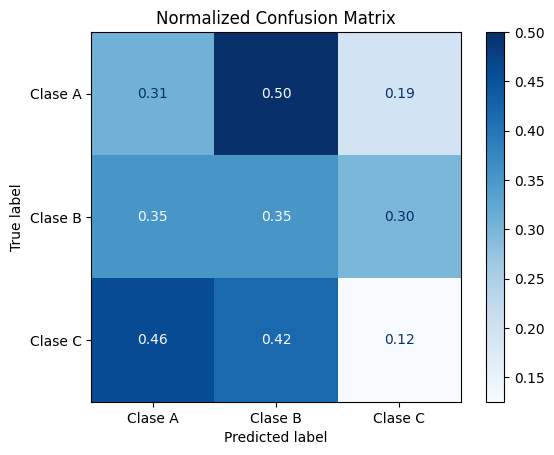

In [73]:
# Plot normalized confussion matrix
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title("Normalized Confusion Matrix")
plt.show()